In [1]:
name = '2016-02-19-numpy-arrays-basics'
title = 'Back to basics: NumPy arrays'
tags = 'numpy'
author = 'Denis Sergeev'

In [2]:
from nb_tools import connect_notebook_to_post
from IPython.core.display import HTML

html = connect_notebook_to_post(name, title, tags, author)

Today we refreshed our knowledge of python numerical arrays and their basic features. 

Basic data containers in Python include

* high-level number objects: integer, floating point, complex, etc.
* containers: lists (costless insertion and append), dictionaries (fast lookup)

### Why not to use lists?

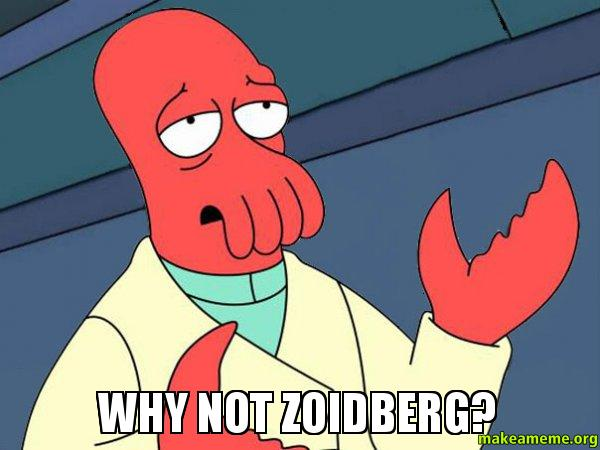

In [3]:
from IPython.display import Image
Image('https://mlpforums.com/uploads/monthly_01_2014/post-6104-0-95171600-1390631637.jpg', width=200, height=200)

* Lists in Python are quite general, can have arbitrary objects as elements.

* Addition and scalar multiplication are defined for lists, but not what we want for numerical computation, e.g.

Addition results in concatenation

In [4]:
x = [1, 2, 3]
y = [10, 20, 30]
x + y

[1, 2, 3, 10, 20, 30]

And multiplication results in repeating:

In [5]:
x = [2, 3]
x * 3

[2, 3, 2, 3, 2, 3]

## NumPy, show me what you got!

### Aside: import conventions

In [6]:
import numpy as np

### NumPy arrays

***NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers. In Numpy dimensions are called axes. The number of axes is rank.***

**Why it is useful:** Memory-efficient container that provides fast numerical operations.

#### Let's compare it to list operations

In [7]:
l = list(range(1000))

In [8]:
%timeit [i**2 for i in l]

1000 loops, best of 3: 291 µs per loop


In [9]:
a = np.arange(1000)

In [10]:
%timeit a**2

The slowest run took 55.82 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.72 µs per loop


### Creating arrays

#### Manually

In [11]:
a = np.array([3, 4, 5, 6])

In [12]:
a

array([3, 4, 5, 6])

The class is called

In [13]:
type(a)

numpy.ndarray

Scalar array

In [14]:
a0 = np.array(7)

In [15]:
a0.ndim

0

In [16]:
b = np.array([[10, 20, 30], [9, 8, 7]])

In [17]:
b

array([[10, 20, 30],
       [ 9,  8,  7]])

In [18]:
c = np.array([[[1], [2]], [[3], [4]]])

In [19]:
c.shape

(2, 2, 1)

#### Common mistakes

In [20]:
try:
    a = np.array(1,2,3,4) # WRONG, throws ValueError
except ValueError as e:
    print(e)

only 2 non-keyword arguments accepted


In [21]:
a = np.array([1,2,3,4]) # RIGHT

Do not use `np.ndarray` function to create an array

In [22]:
np.ndarray([1,2,3,4])

array([[[[  6.89858835e-310,   2.31926746e-316,   6.89858924e-310,
            6.89856523e-310],
         [  6.89858799e-310,   6.89856523e-310,   6.89858924e-310,
            6.89856523e-310],
         [  6.89858799e-310,   6.89856523e-310,   6.89858924e-310,
            6.89856523e-310]],

        [[  6.89858799e-310,   6.89856523e-310,   6.89858924e-310,
            6.89856523e-310],
         [  6.89858799e-310,   6.89856523e-310,   6.89858924e-310,
            6.89856523e-310],
         [  6.89858799e-310,   6.89856523e-310,   6.89858924e-310,
            6.89856523e-310]]]])

### Functions for creating arrays

#### evenly spaced

In [23]:
np.arange(1, 9, 2) # start, end (exclusive), step

array([1, 3, 5, 7])

#### by a number of points

In [24]:
np.linspace(0, 1, 6)   # start, end, num-points

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [25]:
np.logspace(-3,2,7)

array([  1.00000000e-03,   6.81292069e-03,   4.64158883e-02,
         3.16227766e-01,   2.15443469e+00,   1.46779927e+01,
         1.00000000e+02])

#### filled with specific number

* Zeros

In [26]:
np.zeros((2, 3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

* Ones

In [27]:
np.ones((3, 2))

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

* Empty

In [28]:
np.empty([2,3])

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

The function `empty` creates an array whose initial content is random and depends on the state of the memory. By default, the dtype of the created array is float64.

* Random numbers

In [29]:
np.random.seed(1234)

In [30]:
np.random.rand(4)       # uniform in [0, 1]

array([ 0.19151945,  0.62210877,  0.43772774,  0.78535858])

In [31]:
np.random.randn(4)      # Gaussian

array([-0.72058873,  0.88716294,  0.85958841, -0.6365235 ])

#### Special cases

In [32]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [33]:
np.diag(np.array([1, 2, 3, 4]))

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

### [Array attributes](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html#the-basics)

In [34]:
b

array([[10, 20, 30],
       [ 9,  8,  7]])

#### ndarray.ndim
the number of axes (dimensions) of the array. In the Python world, the number of dimensions is referred to as rank.

In [35]:
b.ndim

2

#### ndarray.shape
the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. For a matrix with n rows and m columns, shape will be (n,m). The length of the shape tuple is therefore the rank, or number of dimensions, ndim.

In [36]:
b.shape

(2, 3)

#### ndarray.size
the total number of elements of the array. This is equal to the product of the elements of shape.

In [37]:
b.size

6

Note that `size` is not equal to `len()`. The latter returns the length of the first dimension.

In [38]:
len(b)

2

#### ndarray.dtype
an object describing the type of the elements in the array. One can create or specify dtype’s using standard Python types. Additionally NumPy provides types of its own. numpy.int32, numpy.int16, and numpy.float64 are some examples.

In [39]:
b.dtype

dtype('int64')

#### ndarray.itemsize
the size in bytes of each element of the array.

In [40]:
a.itemsize

8

#### ndarray.data
the buffer containing the actual elements of the array. Normally, we won’t need to use this attribute because we will access the elements in an array using indexing facilities.

In [41]:
b.data

### [Copies and mutability](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html#copies-and-views)

A common source for confusion and mistakes is that numpy arrays are mutable, meaning they can be changed after creation. Other common mutable objects are lists and dictionaries, while tuples are inmutable.

It also implies that when operating and manipulating arrays, their data is sometimes copied into a new array and sometimes not.

#### Example

Create an array

In [42]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Change its 6th element

In [43]:
a[5] = 1000

In [44]:
a

array([   0,    1,    2,    3,    4, 1000,    6,    7,    8,    9,   10,
         11])

#### Simple assignment == no copy at all

In [45]:
a = np.arange(6)

In [46]:
b = a

`a` and `b` are two names for the same `ndarray` object

In [47]:
b is a

True

Change the shape and the 3rd element of **`b`**

In [48]:
b[2] = 999
b.shape = 3, 2

b

array([[  0,   1],
       [999,   3],
       [  4,   5]])

**But** `a` is also changed!

In [49]:
a

array([[  0,   1],
       [999,   3],
       [  4,   5]])

Python passes mutable objects as references, so function calls make no copy neither.

#### View == shallow copy

In [50]:
a = np.arange(6)

In [51]:
c = a.view()

In [52]:
c is a

False

`c` is a `view` of the data owned by `a`

In [53]:
c.base is a

True

In [54]:
c[2] = 999
a # a's data changes

array([  0,   1, 999,   3,   4,   5])

In [55]:
c.shape = 2,3
a.shape # a's shape doesn't change

(6,)

Slicing an array returns a view of it:

In [56]:
s = a[2:5]
s

array([999,   3,   4])

In [57]:
s[:] = 10 # s[:] is a view of s. Note the difference between s=10 and s[:]=10

In [58]:
a

array([ 0,  1, 10, 10, 10,  5])

#### How to avoid confusement? Use deep copy.

In [59]:
a = np.arange(6)

Create a copy using `copy()` attribute

In [60]:
d = a.copy()

The copy doesn't whare anything with the original array:

In [61]:
d is a or d.base is a

False

In [62]:
d[-1] = 1000

In [63]:
d

array([   0,    1,    2,    3,    4, 1000])

In [64]:
a

array([0, 1, 2, 3, 4, 5])

### Looking for help

* Interactive help

In [65]:
np.rollaxis??

In [66]:
np.*space*?

* with NumPy: a built-in search engine

In [67]:
np.lookfor('create array')

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or a ctypes POINTER.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.lib.format.open_memmap
    Open a .npy file as a memory-mapped array.
numpy.ma.MaskedArr

## References
* [NumPy docs](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)
* [SciPy lectures](http://www.scipy-lectures.org/)
* [High Performance Scientific Computing](https://class.coursera.org/scicomp-003)

In [68]:
HTML(html)